In [1]:
import numpy as np
import pandas as pd


data = np.array([-67, -48, 6, 8, 14, 16, 23, 24])


mu1= -55 
mu2 = 15  
sigma1 = 50
sigma2 = 50

p1 = 0.3
p2 = 0.7


def gaussian_pdf(x, mu, sigma_sq):
    return (1 / np.sqrt(2 * np.pi * sigma_sq)) * np.exp(-((x - mu) ** 2) / (2 * sigma_sq))


gamma1 = p1 * gaussian_pdf(data, mu1, sigma1)
gamma2 = p2 * gaussian_pdf(data, mu2, sigma2)
e1 = gamma1 / (gamma1 + gamma2)  
e2 = 1 - e1  


e1_new = np.mean(e1)
e2_new = np.mean(e2)


mu1_new = round(np.sum(e1 * data) / np.sum(e1),3)
mu2_new = round(np.sum(e2 * data) / np.sum(e2),3)


sigma1_new = round(np.sum(e1 * (data - mu1_new) ** 2) / np.sum(e1),3)
sigma2_new = round(np.sum(e2 * (data - mu2_new) ** 2) / np.sum(e2),3)


result = pd.DataFrame({
    'X_i': data,
    'p(Y=1|x_i)': e1,
    'p(Y=2|x_i)': e2,
})

print("E-step:")
print(result)

print("\n(M-step):")
print('p(Y=1|x_i):', e1_new, 'p(Y=2|x_i):', e2_new,
    'mu1:', mu1_new, 'mu2:', mu2_new,
    'sigma1:', sigma1_new, 'sigma2:', sigma2_new )


E-step:
   X_i    p(Y=1|x_i)  p(Y=2|x_i)
0  -67  1.000000e+00         0.0
1  -48  1.000000e+00         0.0
2    6  6.663526e-17         1.0
3    8  4.052094e-18         1.0
4   14  9.111836e-22         1.0
5   16  5.540913e-23         1.0
6   23  3.072525e-27         1.0
7   24  7.576753e-28         1.0

(M-step):
p(Y=1|x_i): 0.25 p(Y=2|x_i): 0.75 mu1: -57.5 mu2: 15.167 sigma1: 90.25 sigma2: 46.139


# Kmeans 

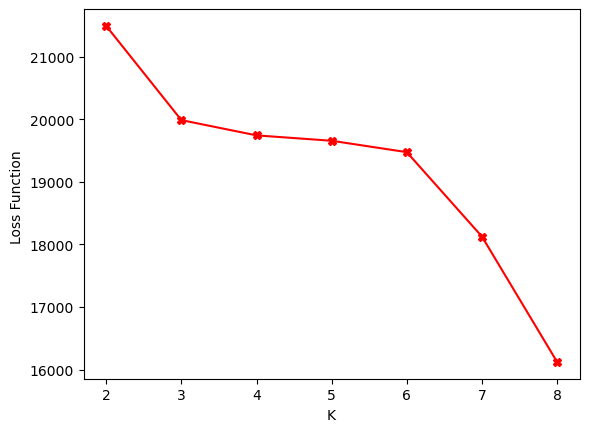

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def k_means(data, K, t=1e-10):
    
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(data.shape[0], dtype=int)

    while True:
        for i in range(data.shape[0]):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        cluster_sizes = np.array([np.sum(labels == k) for k in range(K)])
        # if np.any(cluster_sizes == 0):  
        #     print('yes')
        #     largest_cluster = np.argmax(cluster_sizes)
        #     largest_cluster_points = data[labels == largest_cluster]
            
        #     split_idx = np.random.choice(largest_cluster_points.shape[0], 1, replace=False)
        #     new_centroid1 = largest_cluster_points[split_idx[0]]
        #     new_centroid2 = centroids[largest_cluster]  

        #     empty_cluster = np.where(cluster_sizes == 0)[0][0]
        #     centroids[empty_cluster] = new_centroid1
        #     centroids[largest_cluster] = new_centroid2

        prev_centroids = centroids.copy()
        for k in range(K):
            cluster_points = data[labels == k]
            if len(cluster_points) > 0:
                centroids[k] = cluster_points.mean(axis=0)

        
        if (np.max(np.linalg.norm(centroids - prev_centroids, axis=1)) < t):
            break

    return centroids, labels
    
def loss(centroids, labels, data):
    L_K = 0
    K = centroids.shape[0]
    for i in range(len(data)):
        if labels[i] >= K:
            print(f"Invalid label {labels[i]} for {K} clusters.")
        for j in range(K):
            m_ij = 1 if labels[i] == j else 0
            L_K += m_ij * np.sum((data[i] - centroids[j])**2)
    return L_K




def main():
    df = pd.read_csv('data.csv')

    df = df.iloc[:, 1:10] 

    K_val = [2, 3, 4, 5, 6, 7, 8]
    data = df.to_numpy()
    L_list = []

    for K in K_val:
        centroids, labels = k_means(data, K)

        L_K = loss(centroids, labels, data)
        
        L_list.append(L_K)


    plt.figure()
    plt.plot(K_val, L_list, marker='X', linestyle='-', color='red')
    plt.xlabel('K')
    plt.ylabel('Loss Function ')
    plt.savefig('Out.png')
    plt.show()


if __name__ == "__main__":
    main()

